# <Span style="color:#134f5c"> TRIDENT1 - Modele - Kwiecień 2020 [''kliki_uczenie'']
 

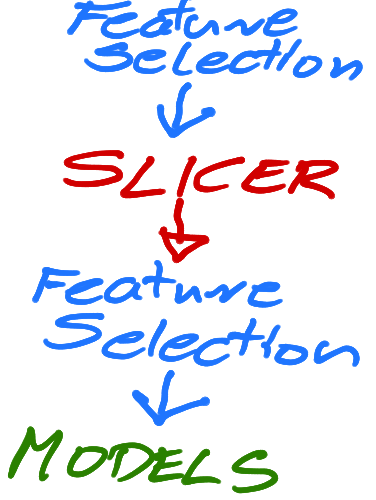

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/7/kliki_uczenie_slicer40.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(597238, 42)

Index(['Unnamed: 0', 'klik', 'kat4', 'strona_domena', 'urz_ip', '3006',
       'urz_model5006', 'urz_id', 'strona_domena5006', '5006',
       'aplikacja_id5007', 'urz_model3006', '3004', '5003', '5007', '3005',
       'aplikacja_id', 'kat95005', '5004', 'strona_id', 'urz_model5007',
       'urz_ip5005', 'strona_domena5005', 'kat3', 'kat95001', 'kat95002',
       'urz_model', 'urz_ip5006', 'urz_ip3007', 'urz_ip3006',
       'strona_domena3004', 'aplikacja_id5004', '3007', 'urz_model5005',
       'aplikacja_id3007', 'strona_domena5004', 'aplikacja_id4007',
       'aplikacja_id3006', 'aplikacja_id5003', 'urz_model3005', 'urz_typ',
       'urz_model3007'],
      dtype='object')


,Unnamed: 0,klik,kat4,strona_domena,urz_ip,3006,urz_model5006,urz_id,strona_domena5006,5006,...,3007,urz_model5005,aplikacja_id3007,strona_domena5004,aplikacja_id4007,aplikacja_id3006,aplikacja_id5003,urz_model3005,urz_typ,urz_model3007
0,741602,0,10050,1234,184125,2054,2153,62777,1075,1571,...,2057,2395,2057,1601,56,2054,1795,1946,1,2030
1,834277,0,10050,1930,258425,459,1881,62777,188,639,...,460,2212,460,554,0,459,1130,3321,1,3453
2,1167548,1,10250,1160,41855,2054,647,62777,916,1571,...,2057,2142,2057,747,56,2054,1795,3878,1,4030


### <span style="color:green"> Kasuje bezsensowne kolumny

In [2]:
# del df['Unnamed: 0']
# del df['Unnamed: 0.1']

### <span style="color:green"> Wielkość bazy df jest ogromna - wyciągam tylko 100% losowo wybranych rekordów</span> 
Taka metoda jest najbardziej reprezentatywna i oszczędza zasoby komputera.

In [3]:
df2 = df.sample(frac = 1.0, random_state=10)
df2.shape

(370287, 42)

## <span style="color:green"> Wyświetlenie braków </span>  (własnej roboty)

In [4]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df2.columns[i]
    r = df2[i].isnull().sum()
    h = df2[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


## <span style="color:green"> Nie warto kasować rekordów z brakami tylko warto wstawiać tam wartości z poza zakresu </span>

Wyszukuje tylko puste rekordy

In [5]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

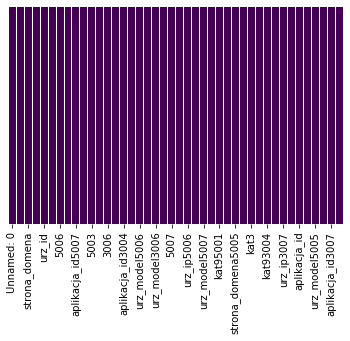

In [6]:
import seaborn as sns

sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Wstawia w puste miejsca wartości z poza zakresu

In [7]:
df2.fillna(7777, inplace=True)

## <span style="color:green"> Przegląd danych pod kontem formatu i ilości wartości unikalnych</span>  (własnej roboty)

In [8]:
a,b = df2.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df2.columns[i]
    h = df2[i].nunique()
    f = df2[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

int64 ---nunique-> 2 ---name-> klik
int64 ---nunique-> 2156 ---name-> strona_domena
int64 ---nunique-> 9 ---name-> kat4
int64 ---nunique-> 60706 ---name-> urz_id
int64 ---nunique-> 2180 ---name-> 3005
int64 ---nunique-> 1720 ---name-> 5006
int64 ---nunique-> 1664 ---name-> strona_domena5006
int64 ---nunique-> 1705 ---name-> aplikacja_id5007
int64 ---nunique-> 4096 ---name-> urz_ip5005
int64 ---nunique-> 1714 ---name-> 5003
int64 ---nunique-> 1713 ---name-> 3004
int64 ---nunique-> 2216 ---name-> 3006
int64 ---nunique-> 1713 ---name-> aplikacja_id5004
int64 ---nunique-> 1713 ---name-> aplikacja_id3004
int64 ---nunique-> 1713 ---name-> 5004
int64 ---nunique-> 2669 ---name-> urz_model5006
int64 ---nunique-> 2216 ---name-> aplikacja_id3006
int64 ---nunique-> 4312 ---name-> urz_model3006
int64 ---nunique-> 2148 ---name-> strona_id
int64 ---nunique-> 1705 ---name-> 5007
int64 ---nunique-> 1709 ---name-> aplikacja_id5005
int64 ---nunique-> 4096 ---name-> urz_ip5006
int64 ---nunique-> 1709 ---n

## <span style="color:green"> Które z tych funkcji są kategoryczne?</span> (własnej roboty)

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 10 unikalnych wartości

In [9]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    h = df2[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
klik --- int64 --- 2
kat4 --- int64 --- 9
kat95001 --- float64 --- 10
kat3 --- int64 --- 8


#### Potrzebujemy listy z numerami kolumnaby użyć jej w CatBoost¶

In [10]:
import numpy as np
a,b = df2.shape     #<- ile mamy kolumn
b

print()
categorical_fun = np.where((df2.dtypes == np.object)|(df2.nunique() <= 15))[0]
x1 = len(categorical_fun)
print('categorical_fun: ',x1)
print('categorical_fun: ',categorical_fun)
print()
numerical_fun = np.where((df2.dtypes != np.object)&(df2.nunique() > 15))[0]
x2 = len(numerical_fun)
print('numerical_fun: ',x2)
print('numerical_fun: ',numerical_fun)
print()
print('LICZBA KOLUMN MA SIĘ ZGADZAĆ!')
print('all columns:                     ',b)
print('numerical_fun + categorical_fun: ',x1+x2)


categorical_fun:  5
categorical_fun:  [ 1  3 26 30 33]

numerical_fun:  37
numerical_fun:  [ 0  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 29 31 32 34 35 36 37 38 39 40 41]

LICZBA KOLUMN MA SIĘ ZGADZAĆ!
all columns:                      42
numerical_fun + categorical_fun:  42


## <span style="color:red"> Uwaga! 
#### <span style="color:red">    1. dane categorialne nie muszą mieć tylko formatu tekstowego, 

#### <span style="color:red">    2. dane tekstowe trzeba przerobić do formatu numerycznego 

### <span style="color:green"> Narzędzie do automatycznego kodowania zmiennych dyskretnych </span>(własnej roboty)


In [11]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df2[i] = pd.Categorical(df2[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------


### <span style="color:green"> Narzędzie do automatycznej zmiany znaku na plus </span>(własnej roboty)

In [12]:
df2.head()

,Unnamed: 0,klik,strona_domena,kat4,urz_id,3005,5006,strona_domena5006,aplikacja_id5007,urz_ip5005,...,kat93004,kat95002,urz_ip3007,urz_ip3006,aplikacja_id,strona_domena3004,urz_model5005,urz_ip,aplikacja_id3007,strona_domena5004
285274,216587,0,1303,10050,40316,1710,1401,237,259,1490,...,966,3.0,50315,45248,2045,966,2101,198846,1736,966
117992,708391,0,1291,10050,40316,1710,1401,769,259,435,...,837,7777.0,46361,41673,2045,837,2133,63238,1736,837
272980,479472,0,1674,10050,40316,1271,809,172,759,2885,...,480,1.0,85010,76440,2008,480,2663,95588,1292,480
369265,1124371,0,167,10050,40316,1710,1401,378,259,2868,...,666,7777.0,159400,143519,2045,666,2559,9963,1736,666
344616,134449,0,1674,10050,40316,391,577,172,843,478,...,480,1.0,76411,68710,1264,480,2116,140648,393,480


### <span style="color:green">Szukamy ujemnych wartości i je zmieniamy (przesuwamy) aby były dodatnie
Filtr Ch2 nie lubi ujemnych wartości

In [13]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NEGATIVE VALUES')
print('---------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].min()
    if f < 0: 
        print(i,"---",f)

NEGATIVE VALUES
---------------


#### Najpierw trzeba się upewnić czy ujemna wartość to nie jest ewidentny błąd

#### usuwamy wartości ujemne (przesuwamy)

In [14]:
#df2['Age_In_Day'] = df2['Age_In_Day']+(-df2['Age_In_Day'].min())
#df2['cons_conf_idx'] = df2['cons_conf_idx']+(-df2['cons_conf_idx'].min())

### <span style="color:green"> Sprawdzam czy nie ma już zmiennych tekstowych i wartości pustych

In [15]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [16]:
obj = np.where(df2.dtypes == np.object)
obj

(array([], dtype=int64),)

## <span style= "color:green"> Ustawiamy zmienną wynikową (manualnie)

In [17]:
result = 'klik'

In [18]:
X = df2.drop(result, axis=1)
y = df2[result]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)
# Jeżeli się rzuca wtedy wycinamy stratify=y.

In [19]:
X_train.columns

Index(['Unnamed: 0', 'strona_domena', 'kat4', 'urz_id', '3005', '5006',
       'strona_domena5006', 'aplikacja_id5007', 'urz_ip5005', '5003', '3004',
       '3006', 'aplikacja_id5004', 'aplikacja_id3004', '5004', 'urz_model5006',
       'aplikacja_id3006', 'urz_model3006', 'strona_id', '5007',
       'aplikacja_id5005', 'urz_ip5006', '5005', 'urz_model5007',
       'aplikacja_id3005', 'kat95001', 'kat95005', 'strona_domena5005',
       'aplikacja_id5003', 'kat3', 'aplikacja_id5006', 'kat93004', 'kat95002',
       'urz_ip3007', 'urz_ip3006', 'aplikacja_id', 'strona_domena3004',
       'urz_model5005', 'urz_ip', 'aplikacja_id3007', 'strona_domena5004'],
      dtype='object')

In [20]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    from sklearn.metrics import accuracy_score
    
    import scikitplot as skplt
    from plot_metric.functions import BinaryClassification
    from sklearn.metrics import precision_recall_curve

       
    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print('Valuation for test data only:')
    print(classification_report(ytest, model.predict(Xtest)))
    
    ## ----------AUC-----------------------------------------
     
    print('---------------------') 
    AUC_train_1 = metrics.roc_auc_score(ytrain,model.predict_proba(Xtrain)[:,1])
    print('AUC_train: %.3f' % AUC_train_1)
    AUC_test_1 = metrics.roc_auc_score(ytest,model.predict_proba(Xtest)[:,1])
    print('AUC_test:  %.3f' % AUC_test_1)
    print('---------------------')    
    
    print("Accuracy Training data:     ", np.round(accuracy_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Accuracy Test data:         ", np.round(accuracy_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("----------------------------------------------------------------------")
    print('Valuation for test data only:')

    y_probas1 = model.predict_proba(Xtest)[:,1]
    y_probas2 = model.predict_proba(Xtest)

### ---plot_roc_curve--------------------------------------------------------
    plt.figure(figsize=(13,4))

    plt.subplot(1, 2, 1)
    bc = BinaryClassification(ytest, y_probas1, labels=["Class 1", "Class 2"])
    bc.plot_roc_curve() 


### --------precision_recall_curve------------------------------------------

    plt.subplot(1, 2, 2)
    precision, recall, thresholds = precision_recall_curve(ytest, y_probas1)

    plt.plot(recall, precision, marker='.', label=model)
    plt.title('Precision recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=(-0.30, -0.6))
    plt.show()

## ----------plot_roc-----------------------------------------

    skplt.metrics.plot_roc(ytest, y_probas2)


## <span style="color:green"> Oversampling

In [21]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    
    print("y = 0: ", sum(ytrain == 0))
    print("y = 1: ", sum(ytrain == 1))
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
        
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show
    

y = 0:  246004
y = 1:  50225
--------------------------------------------------------

Before oversampling Xtrain:      (296229, 41)
Before oversampling ytrain:      (296229,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (547354, 41)
After oversampling ytrain_OV:   (547354, 1)
--------------------------------------------------------


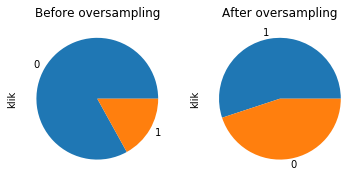

In [22]:
oversampling(y_train, X_train)

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Logistic Regression Model</span>

In [23]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon Apr 20 14:59:06 2020
Measuring the time to complete this task


In [24]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(Xtrain_OV, ytrain_OV) 
y_pred_LRC = LR_Grid.predict(X_test)

In [25]:
Time_LR_Grid =((time.time() - start_time)/60) 
Time_LR_Grid = np.round((Time_LR_Grid), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Czas:                                  ',Time_LR_Grid)
Time_LR_Grid_R = np.round((Time_LR_Grid/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_LR_Grid_R)

Czas:                                   3.5666
Time for one record in seconds x 1000:  0.391


Recall Training data:      0.7861
Precision Training data:   0.5953
----------------------------------------------------------------------
Recall Test data:          0.7878
Precision Test data:       0.1978
----------------------------------------------------------------------
Confusion Matrix Test data
[[21375 40126]
 [ 2665  9892]]
----------------------------------------------------------------------
Valuation for test data only:
              precision    recall  f1-score   support

           0       0.89      0.35      0.50     61501
           1       0.20      0.79      0.32     12557

    accuracy                           0.42     74058
   macro avg       0.54      0.57      0.41     74058
weighted avg       0.77      0.42      0.47     74058

---------------------
AUC_train: 0.618
AUC_test:  0.619
---------------------
Accuracy Training data:      0.5881
Accuracy Test data:          0.4222
----------------------------------------------------------------------
Valuation for t

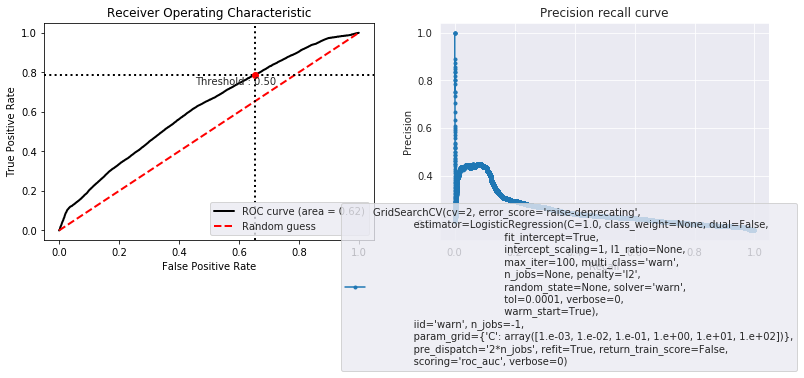

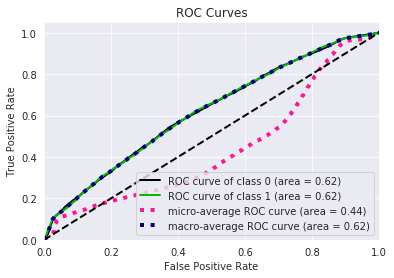

In [26]:
Classification_Assessment(LR_Grid ,Xtrain_OV, ytrain_OV, X_test, y_test)

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Random Forest Classifier</span>

In [27]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon Apr 20 15:02:43 2020
Measuring the time to complete this task


In [28]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier (random_state = 1, 
                                  n_estimators = 750, 
                                  max_depth = 2, 
                                  min_samples_split = 2, min_samples_leaf = 3) 
rfc = rfc.fit(Xtrain_OV, ytrain_OV)
y_pred_RFC = rfc.predict(X_test)

In [29]:
Time_CV_rfc =((time.time() - start_time)/60) 
Time_CV_rfc = np.round((Time_CV_rfc), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Czas:                                  ',Time_CV_rfc)
Time_CV_rfc_R = np.round((Time_CV_rfc/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_CV_rfc_R)

Czas:                                   4.3474
Time for one record in seconds x 1000:  0.4766


Recall Training data:      0.9021
Precision Training data:   0.5928
----------------------------------------------------------------------
Recall Test data:          0.8981
Precision Test data:       0.1947
----------------------------------------------------------------------
Confusion Matrix Test data
[[14849 46652]
 [ 1280 11277]]
----------------------------------------------------------------------
Valuation for test data only:
              precision    recall  f1-score   support

           0       0.92      0.24      0.38     61501
           1       0.19      0.90      0.32     12557

    accuracy                           0.35     74058
   macro avg       0.56      0.57      0.35     74058
weighted avg       0.80      0.35      0.37     74058

---------------------
AUC_train: 0.637
AUC_test:  0.634
---------------------
Accuracy Training data:      0.6049
Accuracy Test data:          0.3528
----------------------------------------------------------------------
Valuation for t

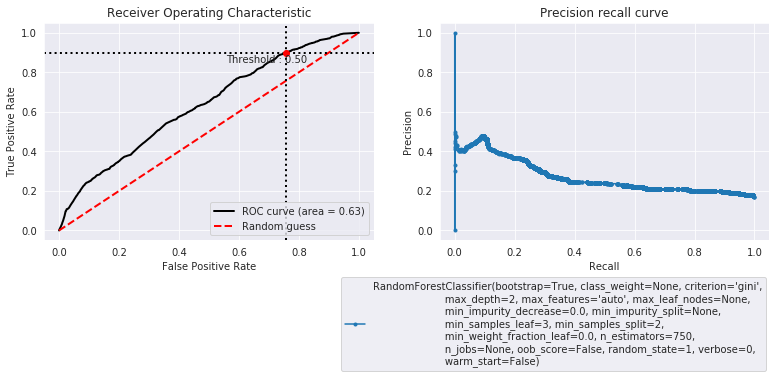

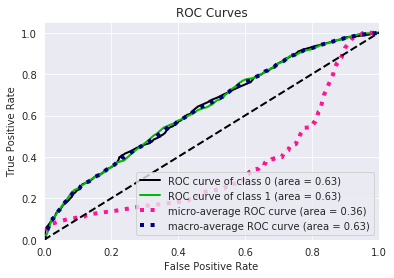

In [30]:
Classification_Assessment(rfc ,Xtrain_OV, ytrain_OV, X_test, y_test)

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Naive Bayes Classifier</span>

In [31]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon Apr 20 15:09:13 2020
Measuring the time to complete this task


In [32]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(Xtrain_OV, ytrain_OV)

GaussianNB(priors=None, var_smoothing=1e-09)

y_pred_NBC = NBC.predict(X_test)

In [33]:
Time_NBC =((time.time() - start_time)/60) 
Time_NBC = np.round((Time_NBC), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Czas:                                  ',Time_NBC)
Time_NBC_R = np.round((Time_NBC/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_NBC_R)

Czas:                                   0.0124
Time for one record in seconds x 1000:  0.0014


Recall Training data:      0.7796
Precision Training data:   0.59
----------------------------------------------------------------------
Recall Test data:          0.7783
Precision Test data:       0.1938
----------------------------------------------------------------------
Confusion Matrix Test data
[[20856 40645]
 [ 2784  9773]]
----------------------------------------------------------------------
Valuation for test data only:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49     61501
           1       0.19      0.78      0.31     12557

    accuracy                           0.41     74058
   macro avg       0.54      0.56      0.40     74058
weighted avg       0.77      0.41      0.46     74058

---------------------
AUC_train: 0.606
AUC_test:  0.606
---------------------
Accuracy Training data:      0.5804
Accuracy Test data:          0.4136
----------------------------------------------------------------------
Valuation for tes

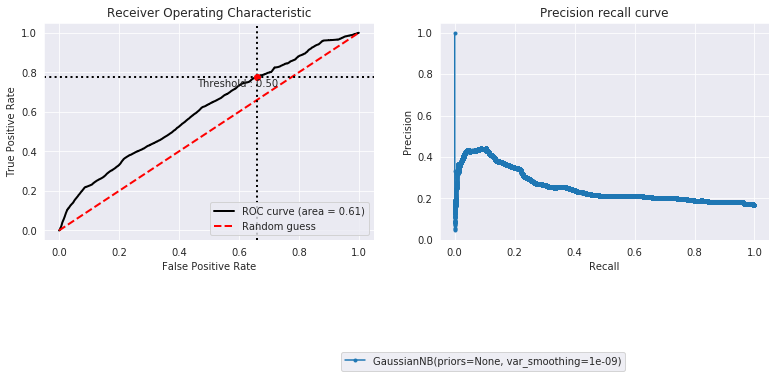

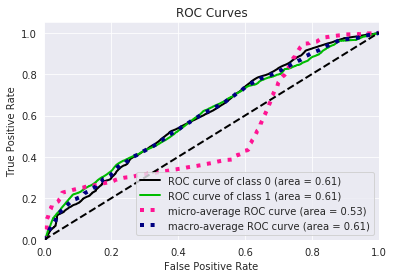

In [34]:
Classification_Assessment(NBC ,Xtrain_OV, ytrain_OV, X_test, y_test)

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Support Vector Machines - Gaussian</span>

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">Support Vector Machines - linear</span>

## <span style="color:#1155cc;font-style:italic;background-color:#ddd">CatBoost</span>

In [35]:
## Potrzebujemy listy z numerami kolumn kategorycznych dla CatBoost

import numpy as np
a,b = df.shape     #<- ile mamy kolumn
b

print()
cat_fun2 = np.where(df.dtypes == np.object)[0]    #|(df2.nunique() <= 3)
x1 = len(cat_fun2)
print('cat_fun2: ',x1)
print('cat_fun2: ',cat_fun2)


cat_fun2:  0
cat_fun2:  []


In [36]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())
print('Measuring the time to complete this task')

Mon Apr 20 15:09:19 2020
Measuring the time to complete this task


In [37]:
from catboost import CatBoostClassifier, Pool, cv

params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 148,
    'logging_level': 'Silent',
    'use_best_model': False,
    'od_type': 'Iter',
    'od_wait': 40
}

train_pool = Pool(Xtrain_OV, ytrain_OV, cat_features=cat_fun2)
validate_pool = Pool(X_test, y_test, cat_features=cat_fun2)

CBC = CatBoostClassifier(**params)
CBC.fit(train_pool, eval_set=validate_pool, plot=False)

In [38]:
Time_CBC =((time.time() - start_time)/60) 
Time_CBC = np.round((Time_CBC), decimals=4)
## koniec pomiaru czasu
r,C = (Xtrain_OV.shape )
print('Time:                                  ',Time_CBC)
Time_CBC_R = np.round((Time_CBC/r)*60*1000, decimals=4)

print('Time for one record in seconds x 1000: ',Time_CBC_R)

Time:                                   1.3685
Time for one record in seconds x 1000:  0.15


Recall Training data:      0.8171
Precision Training data:   0.6961
----------------------------------------------------------------------
Recall Test data:          0.7836
Precision Test data:       0.2655
----------------------------------------------------------------------
Confusion Matrix Test data
[[34274 27227]
 [ 2717  9840]]
----------------------------------------------------------------------
Valuation for test data only:
              precision    recall  f1-score   support

           0       0.93      0.56      0.70     61501
           1       0.27      0.78      0.40     12557

    accuracy                           0.60     74058
   macro avg       0.60      0.67      0.55     74058
weighted avg       0.81      0.60      0.65     74058

---------------------
AUC_train: 0.758
AUC_test:  0.730
---------------------
Accuracy Training data:      0.7029
Accuracy Test data:          0.5957
----------------------------------------------------------------------
Valuation for t

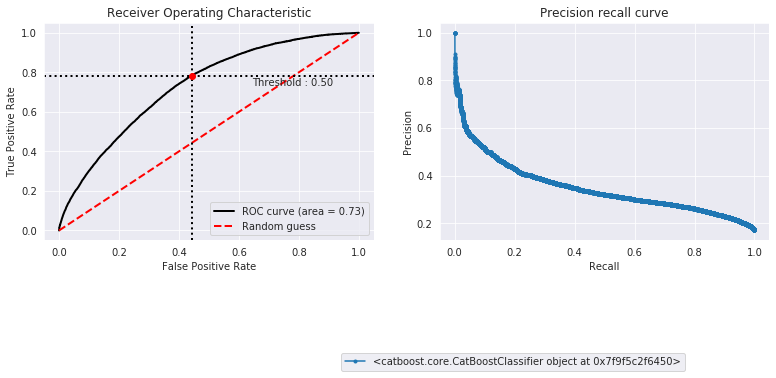

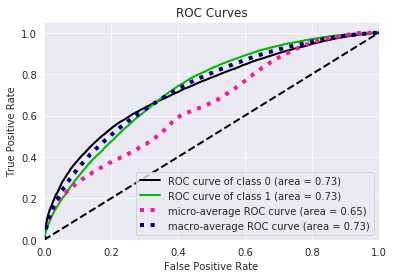

In [39]:
Classification_Assessment(CBC ,Xtrain_OV, ytrain_OV, X_test, y_test)

## <span style="color:green"> Ocena modeli

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print('Logistic Regression Model:') 
print('Time in min.: ', Time_LR_Grid)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, LR_Grid.predict(X_test))))
AUC_train_LR_Grid = metrics.roc_auc_score(ytrain_OV,LR_Grid.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_LR_Grid)
AUC_test_LR_Grid = metrics.roc_auc_score(y_test,LR_Grid.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_LR_Grid)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, LR_Grid.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, LR_Grid.predict(X_test)), decimals=4)) 



print('------------------------------------------')
print('Random Forest Classifier:') 
print('Time in min.: ', Time_CV_rfc)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, rfc.predict(X_test))))
AUC_train_rfc = metrics.roc_auc_score(ytrain_OV,rfc.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_rfc)
AUC_test_rfc = metrics.roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_rfc)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, rfc.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, rfc.predict(X_test)), decimals=4)) 



print('------------------------------------------')
print('Naive Bayes Classifier:') 
print('Time in min.: ', Time_NBC)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, NBC.predict(X_test))))
AUC_train_NBC = metrics.roc_auc_score(ytrain_OV,NBC.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_NBC)
AUC_test_NBC = metrics.roc_auc_score(y_test,NBC.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_NBC)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, NBC.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, NBC.predict(X_test)), decimals=4)) 


print('------------------------------------------')
print('CatBoost:') 
print('Time in min.: ', Time_CBC)      
print('validation accuracy:   {:.4}'.format(accuracy_score(y_test, CBC.predict(X_test))))
AUC_train_CBC = metrics.roc_auc_score(ytrain_OV,CBC.predict_proba(Xtrain_OV)[:,1])
print('AUC_train:                   %.3f' % AUC_train_CBC)
AUC_test_CBC = metrics.roc_auc_score(y_test,CBC.predict_proba(X_test)[:,1])
print('AUC_test:                    %.3f' % AUC_test_CBC)

print("Accuracy Training data:     ", np.round(accuracy_score(ytrain_OV, CBC.predict(Xtrain_OV)), decimals=4))
print("Accuracy Test data:         ", np.round(accuracy_score(y_test, CBC.predict(X_test)), decimals=4)) 


Logistic Regression Model:
Time in min.:  3.5666
validation accuracy:   0.4222
AUC_train:                   0.618
AUC_test:                    0.619
Accuracy Training data:      0.5881
Accuracy Test data:          0.4222
------------------------------------------
Random Forest Classifier:
Time in min.:  4.3474
validation accuracy:   0.3528
AUC_train:                   0.637
AUC_test:                    0.634
Accuracy Training data:      0.6049
Accuracy Test data:          0.3528
------------------------------------------
Naive Bayes Classifier:
Time in min.:  0.0124
validation accuracy:   0.4136
AUC_train:                   0.606
AUC_test:                    0.606
Accuracy Training data:      0.5804
Accuracy Test data:          0.4136
------------------------------------------
CatBoost:
Time in min.:  1.3685
validation accuracy:   0.5957
AUC_train:                   0.758
AUC_test:                    0.730
Accuracy Training data:      0.7029
Accuracy Test data:          0.5957


# '20'
liczebność: 370 287

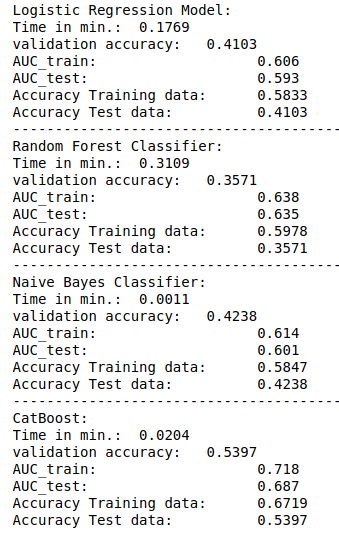

# '10'
liczebność: 370 287

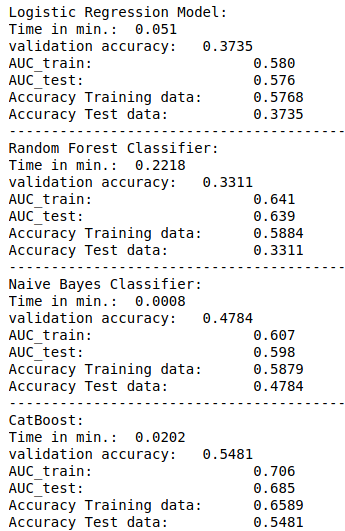

# '40' najlepszy
liczebność: 370 287



liczebność: 370 287 duży zbiór


